# Spotify + Billboard Hot 100

[Imports](#imports) - [Definitions](#definitions) - [Acquire](#acquire) - [Explore](#explore)  -  [Model](#model)  -  [Evaluate](#evaluate)  -  [Test](#test)  -  [Summary](#summary)  -  [Take Aways](#takeaways)

In [1]:
import pandas as pd
from tqdm import tqdm
import os
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from scipy import stats

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score


from IPython.display import display, Markdown

from wrangle import *

import warnings
warnings.filterwarnings("ignore")

# Goals <a id="goals"></a>
* Discover drivers of charting on the Billboard 100 in the Spotify Data
* Use significant drivers to develop a machine learning model 

# Acquire

* Data was acquired from Kaggle & Github
* Left merged Billboard dataset using unique key combined from features
* Spotify dataset contained 2000 samples and 20 features from 2000 to 2019
* Billboard Hot 100 dataset contained 336_295 samples and 12 features from 1958 - 2020
* Each row represents a song consindered a hit
* Each column represents a feature of those songs

[Imports](#imports) - [Definitions](#definitions) - [Acquire](#acquire) - [Explore](#explore)  -  [Model](#model)  -  [Evaluate](#evaluate)  -  [Test](#test)  -  [Summary](#summary)  -  [Take Aways](#takeaways)

In [2]:
!pwd

/Users/dusts/codeup-data-science/individual-project


In [3]:
df = acquire()

Found File


Loading hot_100.csv: 337it [00:00, 412.58it/s]


Found File


Loading songs_normalize.csv: 2it [00:00, 487.20it/s]


# Prepare

**Prepare Actions:**
* Removed columns that did not contain useful information
* Cleaned data due to complex naming
* Fixed Nulls From Key Errors
* Checked that column data types were appropriate
* Fixed incorrect datatypes
* Encoded categorical bi-variate
* Split data into train, validate and test

In [4]:
df = df.drop(columns = ['chart_position', 'instance','popularity',
       'consecutive_weeks', 'previous_week', 'peak_position',
       'worst_position'])

# Data Dictionary

In [5]:
%%html
<style>
table {float:left}
</style>

| Name             | Definition |
| :--------------- | :--------- |
| duration_ms      | Duration of the track in milliseconds |
| energy           | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.  |
| loudness         | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db. |
| valence          | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
| acousticness     | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
| year             | Release Year of the track |
| explicit         | The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children. |
| instrumentalness | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| mode             | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.  |
| speechiness      | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |

# Explore

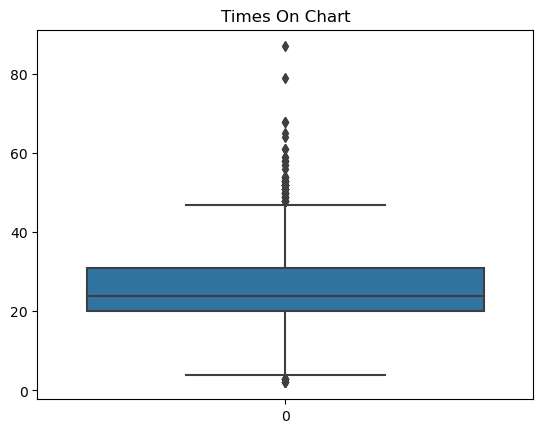

In [6]:
sns.boxplot(df['time_on_chart'])
plt.title("Times On Chart")
plt.show()

In [7]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'genre', 'song_id',
       'time_on_chart', 'chart_debut', 'chart_url', 'date'],
      dtype='object')

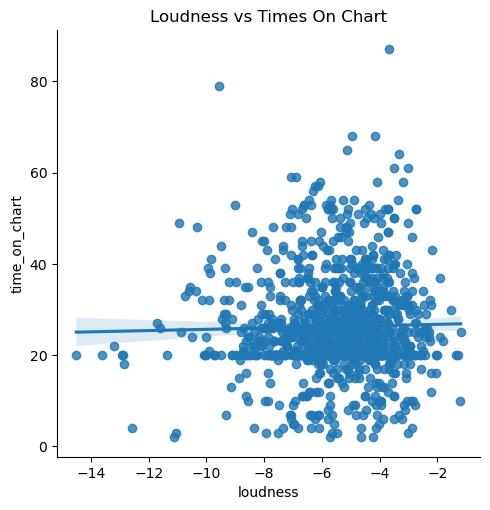

In [8]:
sns.lmplot(data=df,x='loudness',y='time_on_chart')
plt.title("Loudness vs Times On Chart")
plt.show()

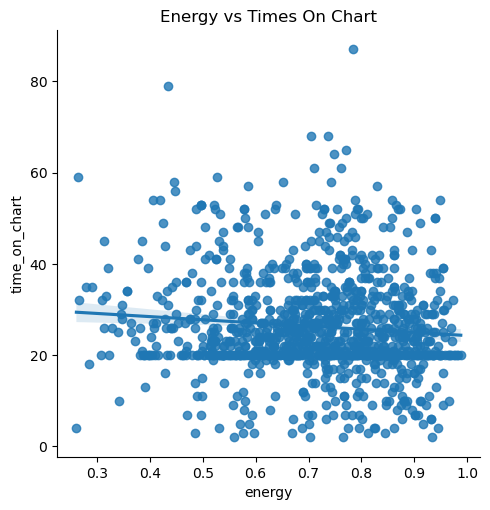

In [9]:
sns.lmplot(data=df,x='energy',y='time_on_chart')
plt.title("Energy vs Times On Chart")
plt.show()

# Question #1:

# Does a higher duration_ms mean higher time_on_chart?

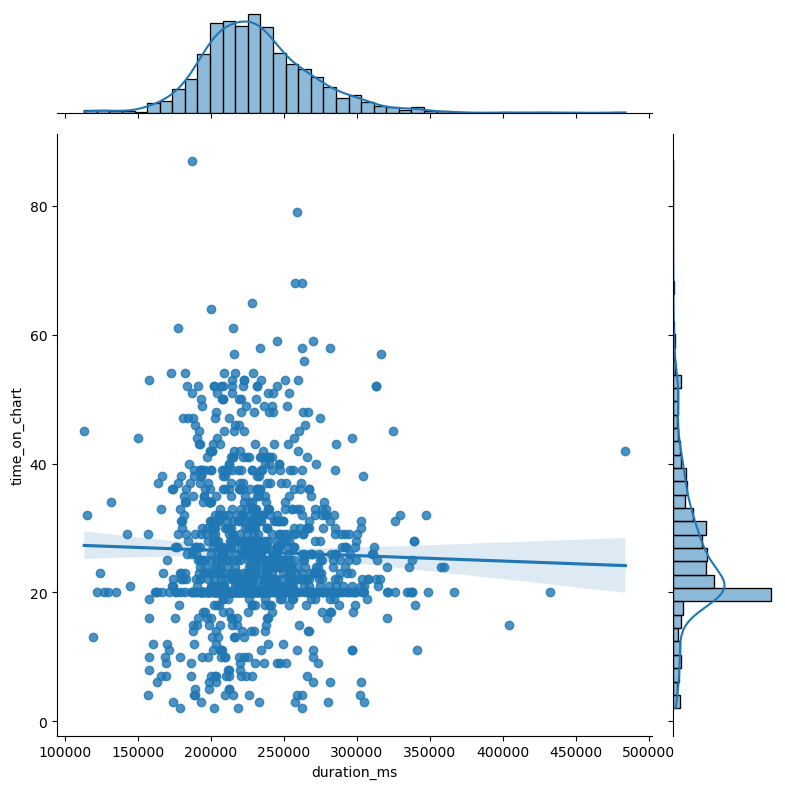

### Hypothesis:

$H_0$: There is no relationship between `duration_ms` to `time_on_chart`

$H_A$: There is a relationship between `duration_ms` and `time_on_chart` 

### Statistics Test:

### `Pearson's R = -0.029301798086126058`

### Results:

### Failed to Reject $H_0$

There is not a significant relationship between duration_ms and time_on_chart. (p-value: 0.3274)

<hr style="border:2px solid gray">

# Question #2:

# Does a higher year mean higher time_on_chart?

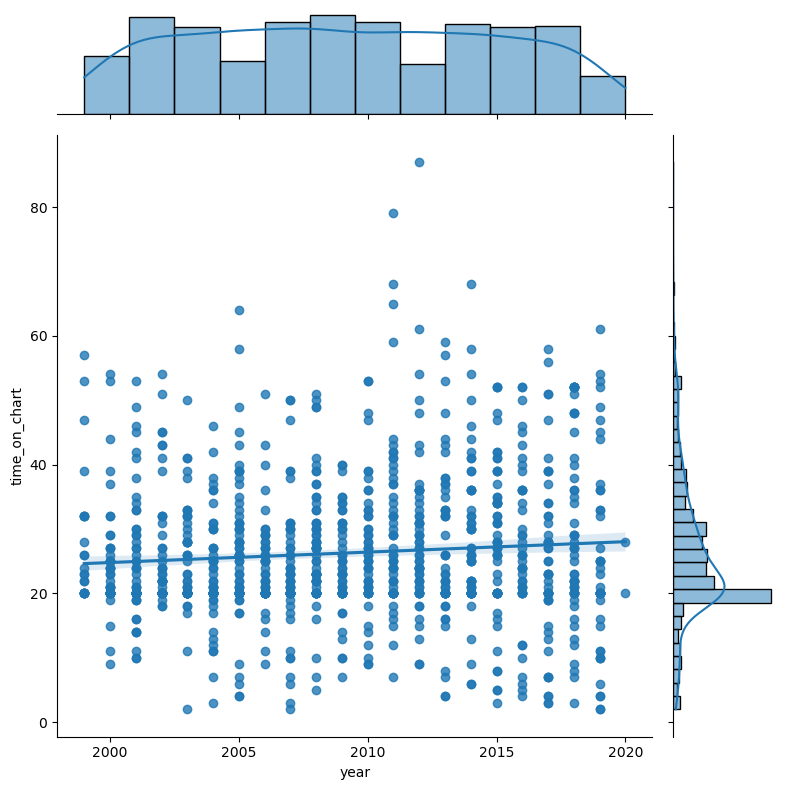

### Hypothesis:

$H_0$: There is no relationship between `year` to `time_on_chart`

$H_A$: There is a relationship between `year` and `time_on_chart` 

### Statistics Test:

### `Pearson's R = 0.08515576037947584`

### Results:

### Reject $H_0$

There exists some relationship between year and time_on_chart. (p-value: 0.0044)

<hr style="border:2px solid gray">

# Question #3:

# Does a higher danceability mean higher time_on_chart?

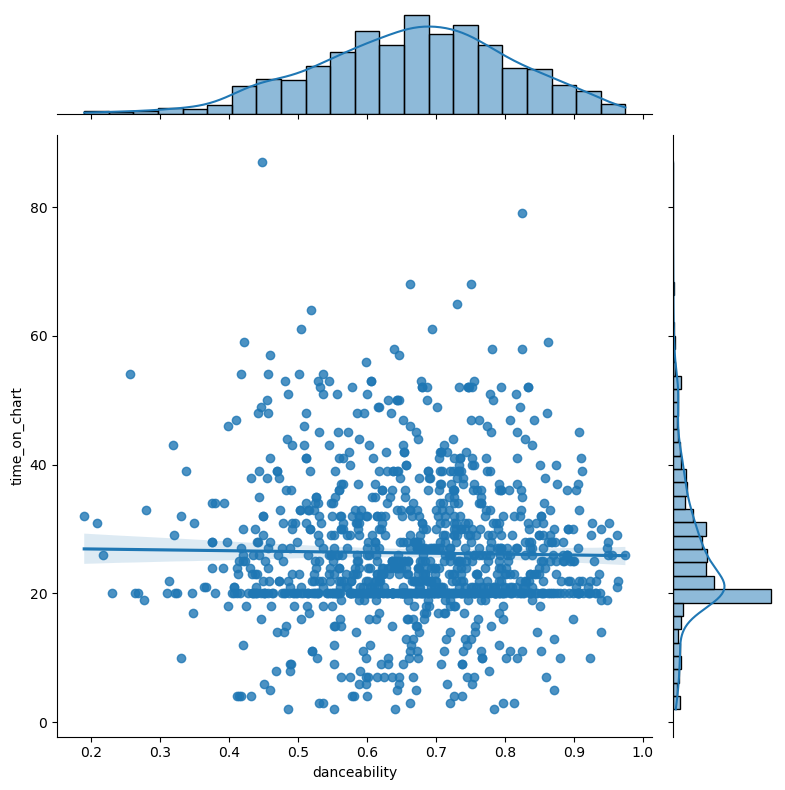

### Hypothesis:

$H_0$: There is no relationship between `danceability` to `time_on_chart`

$H_A$: There is a relationship between `danceability` and `time_on_chart` 

### Statistics Test:

### `Pearson's R = -0.017039593144861975`

### Results:

### Failed to Reject $H_0$

There is not a significant relationship between danceability and time_on_chart. (p-value: 0.5691)

<hr style="border:2px solid gray">

# Question #4:

# Does a higher energy mean higher time_on_chart?

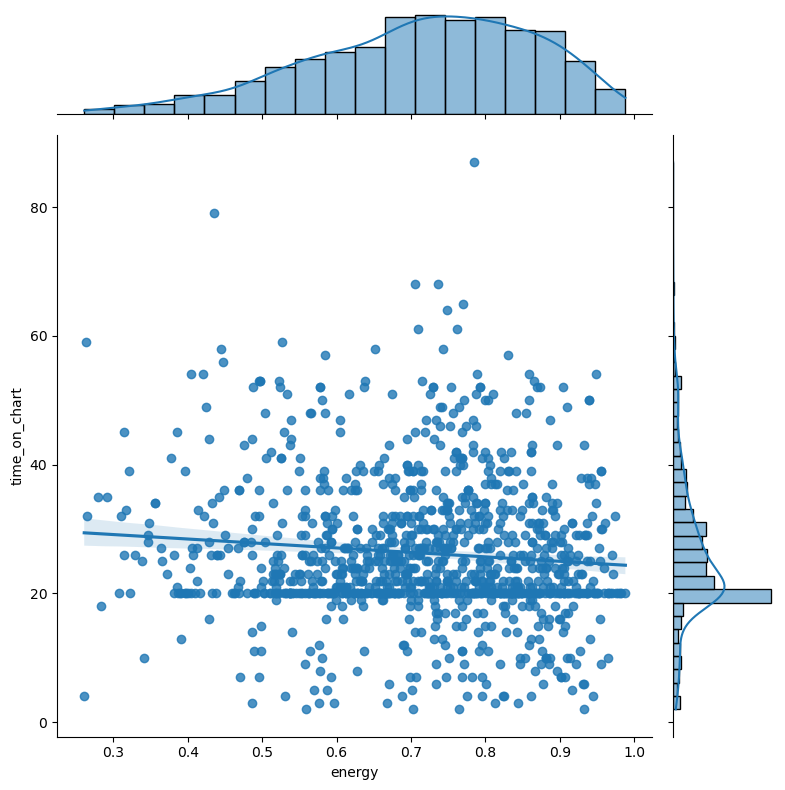

### Hypothesis:

$H_0$: There is no relationship between `energy` to `time_on_chart`

$H_A$: There is a relationship between `energy` and `time_on_chart` 

### Statistics Test:

### `Pearson's R = -0.09449067368126929`

### Results:

### Reject $H_0$

There exists some relationship between energy and time_on_chart. (p-value: 0.0016)

<hr style="border:2px solid gray">

# Question #5:

# Does a higher key mean higher time_on_chart?

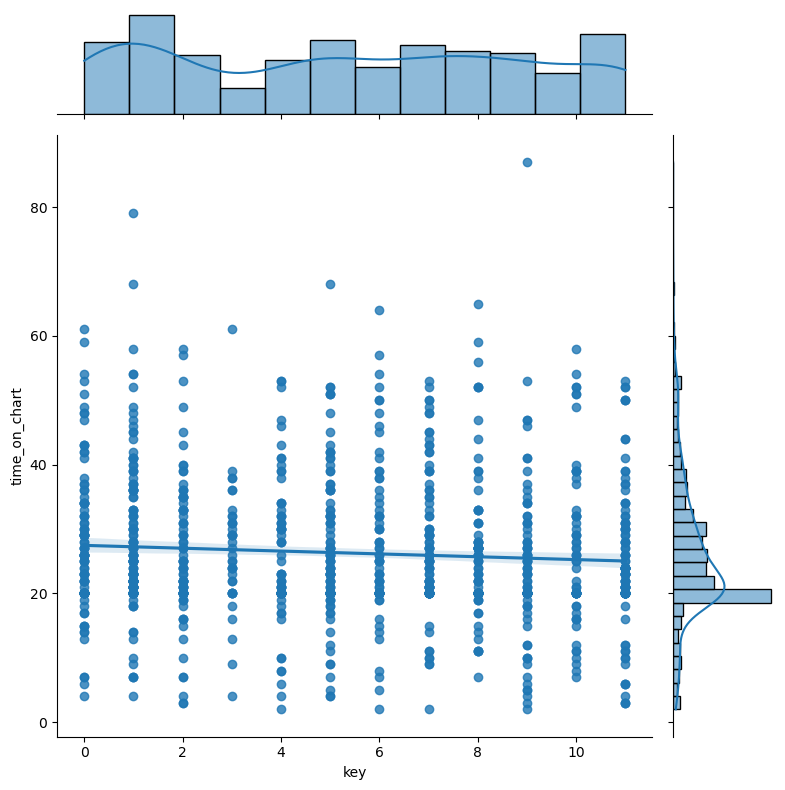

### Hypothesis:

$H_0$: There is no relationship between `key` to `time_on_chart`

$H_A$: There is a relationship between `key` and `time_on_chart` 

### Statistics Test:

### `Pearson's R = -0.07271433578230616`

### Results:

### Reject $H_0$

There exists some relationship between key and time_on_chart. (p-value: 0.0150)

<hr style="border:2px solid gray">

# Question #6:

# Does a higher loudness mean higher time_on_chart?

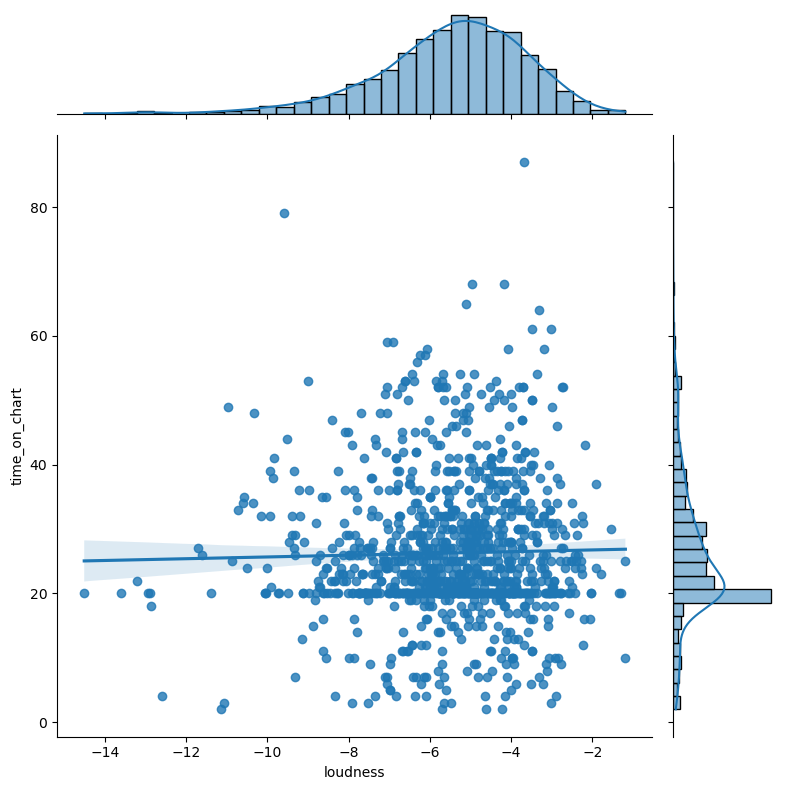

### Hypothesis:

$H_0$: There is no relationship between `loudness` to `time_on_chart`

$H_A$: There is a relationship between `loudness` and `time_on_chart` 

### Statistics Test:

### `Pearson's R = 0.022961801860786453`

### Results:

### Failed to Reject $H_0$

There is not a significant relationship between loudness and time_on_chart. (p-value: 0.4429)

<hr style="border:2px solid gray">

write code for different test


# Question #8:

# Does a higher speechiness mean higher time_on_chart?

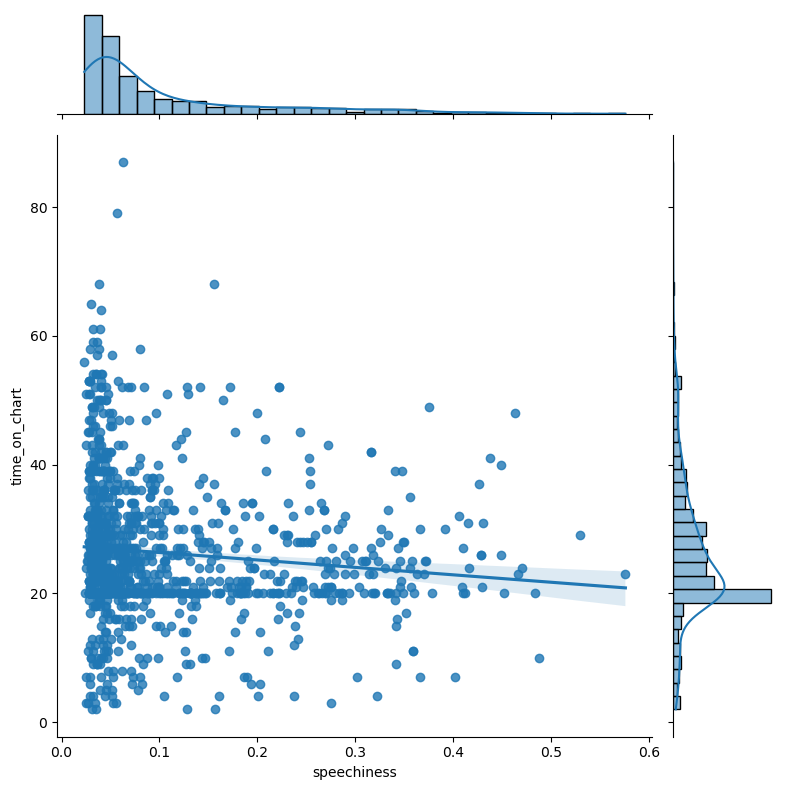

### Hypothesis:

$H_0$: There is no relationship between `speechiness` to `time_on_chart`

$H_A$: There is a relationship between `speechiness` and `time_on_chart` 

### Statistics Test:

### `Pearson's R = -0.10471269663659986`

### Results:

### Reject $H_0$

There exists some relationship between speechiness and time_on_chart. (p-value: 0.0005)

<hr style="border:2px solid gray">

# Question #9:

# Does a higher acousticness mean higher time_on_chart?

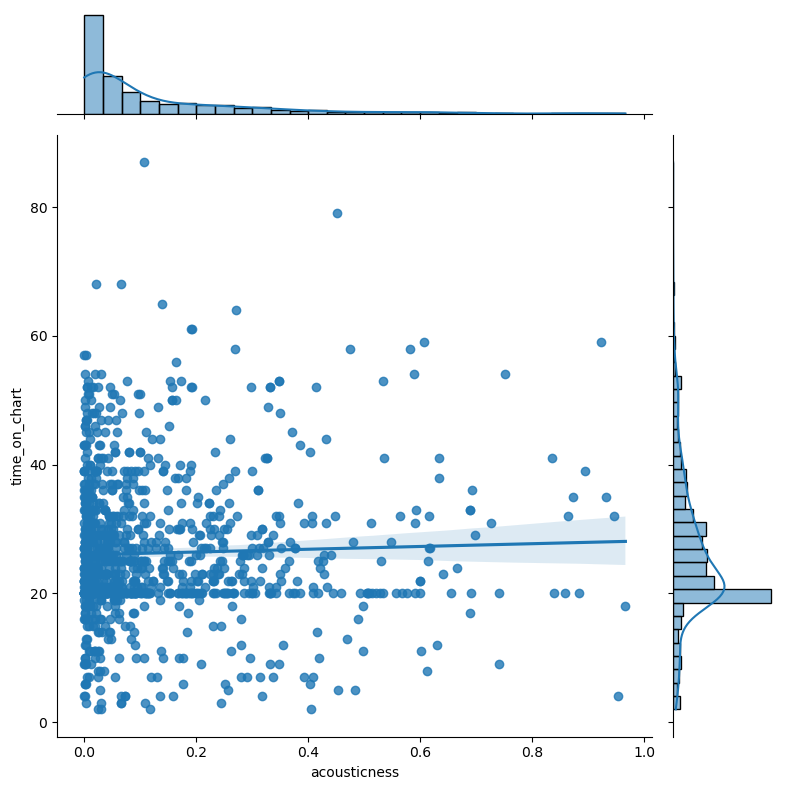

### Hypothesis:

$H_0$: There is no relationship between `acousticness` to `time_on_chart`

$H_A$: There is a relationship between `acousticness` and `time_on_chart` 

### Statistics Test:

### `Pearson's R = 0.03377985551602524`

### Results:

### Failed to Reject $H_0$

There is not a significant relationship between acousticness and time_on_chart. (p-value: 0.2589)

<hr style="border:2px solid gray">

# Question #10:

# Does a higher instrumentalness mean higher time_on_chart?

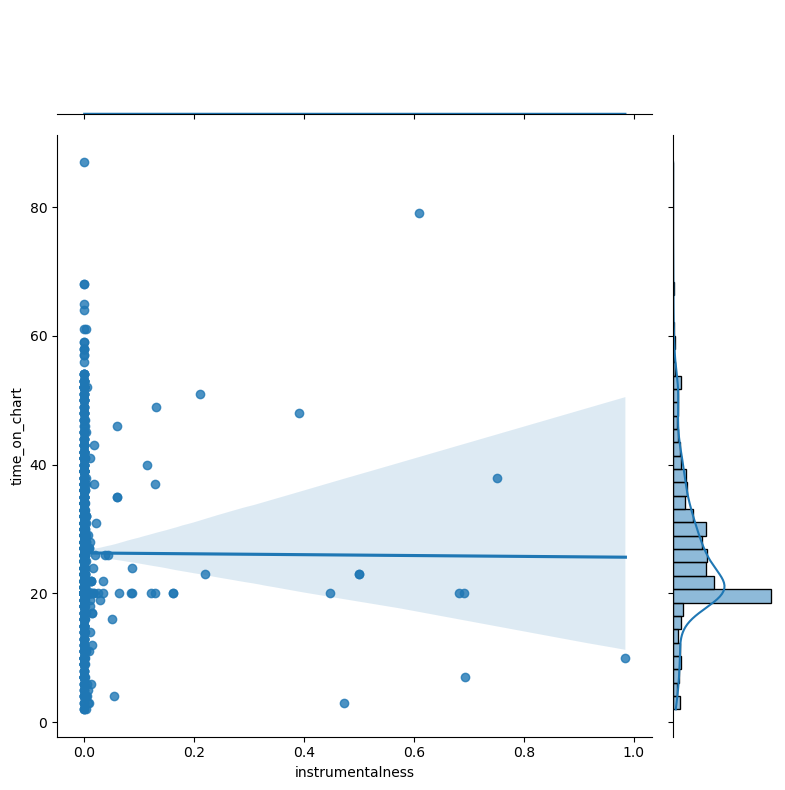

### Hypothesis:

$H_0$: There is no relationship between `instrumentalness` to `time_on_chart`

$H_A$: There is a relationship between `instrumentalness` and `time_on_chart` 

### Statistics Test:

### `Pearson's R = -0.0039098680740875386`

### Results:

### Failed to Reject $H_0$

There is not a significant relationship between instrumentalness and time_on_chart. (p-value: 0.8961)

<hr style="border:2px solid gray">

# Question #11:

# Does a higher liveness mean higher time_on_chart?

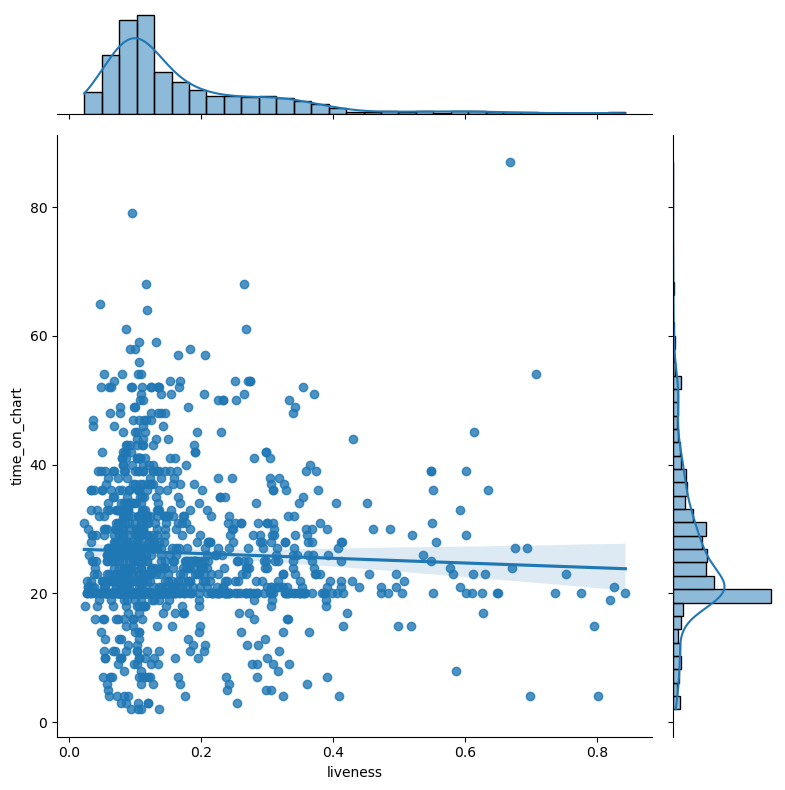

### Hypothesis:

$H_0$: There is no relationship between `liveness` to `time_on_chart`

$H_A$: There is a relationship between `liveness` and `time_on_chart` 

### Statistics Test:

### `Pearson's R = -0.04477949881438156`

### Results:

### Failed to Reject $H_0$

There is not a significant relationship between liveness and time_on_chart. (p-value: 0.1344)

<hr style="border:2px solid gray">

# Question #12:

# Does a higher valence mean higher time_on_chart?

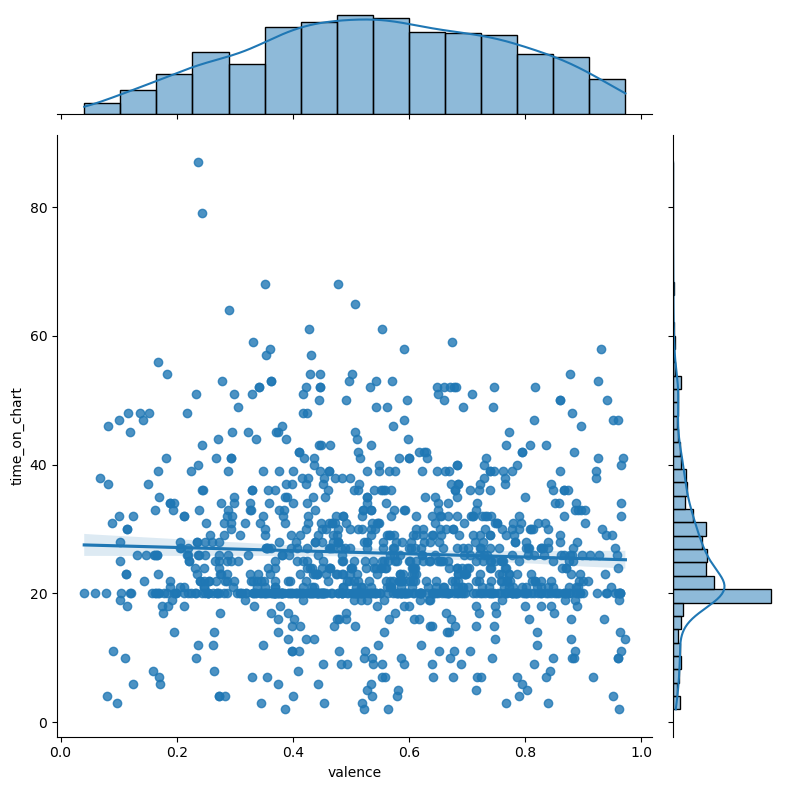

### Hypothesis:

$H_0$: There is no relationship between `valence` to `time_on_chart`

$H_A$: There is a relationship between `valence` and `time_on_chart` 

### Statistics Test:

### `Pearson's R = -0.048658073003431425`

### Results:

### Failed to Reject $H_0$

There is not a significant relationship between valence and time_on_chart. (p-value: 0.1038)

<hr style="border:2px solid gray">

# Question #13:

# Does a higher tempo mean higher time_on_chart?

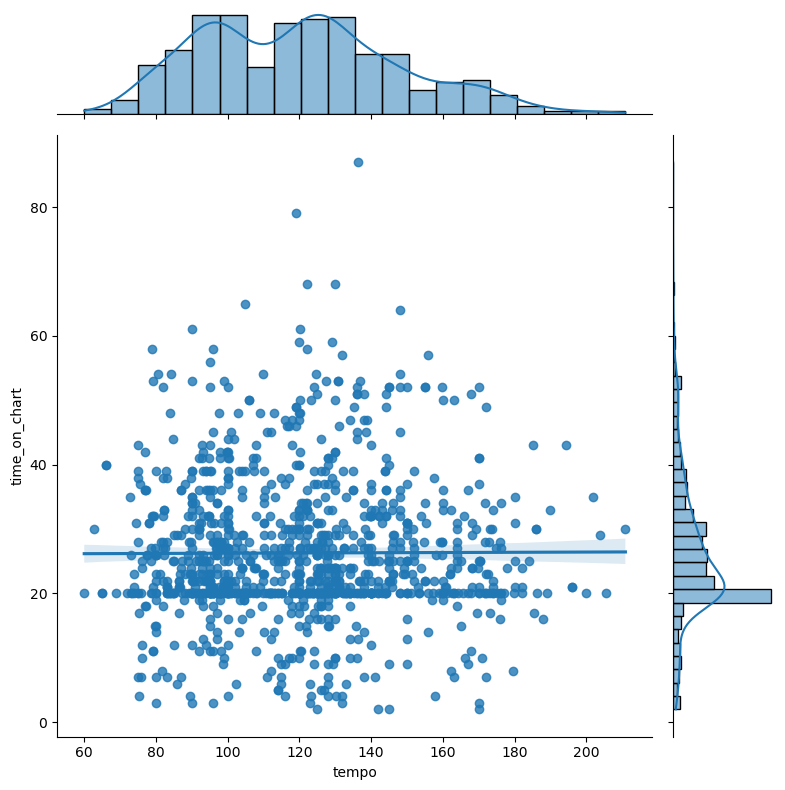

### Hypothesis:

$H_0$: There is no relationship between `tempo` to `time_on_chart`

$H_A$: There is a relationship between `tempo` and `time_on_chart` 

### Statistics Test:

### `Pearson's R = 0.004550615639695118`

### Results:

### Failed to Reject $H_0$

There is not a significant relationship between tempo and time_on_chart. (p-value: 0.8791)

<hr style="border:2px solid gray">

# Question #14:

# Does a higher time_on_chart mean higher time_on_chart?

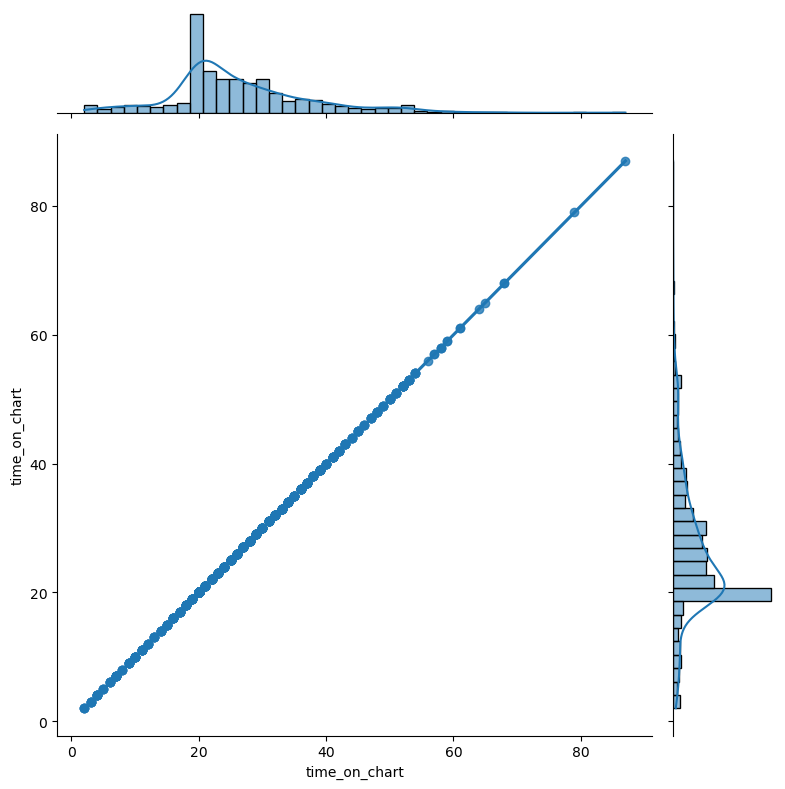

### Hypothesis:

$H_0$: There is no relationship between `time_on_chart` to `time_on_chart`

$H_A$: There is a relationship between `time_on_chart` and `time_on_chart` 

### Statistics Test:

### `Pearson's R = 1.0`

### Results:

### Reject $H_0$

There exists some relationship between time_on_chart and time_on_chart. (p-value: 0.0000)

<hr style="border:2px solid gray">

In [10]:
target = 'time_on_chart'
num_columns_list = df.select_dtypes('number').columns
for num,feature in enumerate(num_columns_list):
    question_hypothesis_test((num+1),df,feature,target)

# Model

In [11]:
train, val, test = split_data(df)

(626, 22) (269, 22) (224, 22)


In [12]:
target = "time_on_chart"

In [13]:
X_train, y_train = isolate_target(train,target)
X_validate, y_validate = isolate_target(val,target)
X_test, y_test = isolate_target(test,target)

(626, 21) (626,)
(269, 21) (269,)
(224, 21) (224,)


In [14]:
X_train_scaled = scale_data(X_train)
X_validate_scaled = scale_data(X_validate)
X_test_scaled = scale_data(X_test)

In [15]:
to_dummies=['explicit']

In [16]:
X_train_scaled = dummies(X_train_scaled,to_dummies)
X_validate_scaled = dummies(X_validate_scaled,to_dummies)
X_test_scaled = dummies(X_test_scaled,to_dummies)

In [17]:
# parameters: f_regression stats test, give me 8 features
f_selector = SelectKBest(f_regression, k=4)

# find the top 8 X's correlated with y
f_selector.fit(X_train_scaled, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()
f_feature

['explicit', 'year', 'mode', 'speechiness']

In [18]:
# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, n_features_to_select=4)

# fit the data using RFE
rfe.fit(X_train_scaled, y_train)

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()
rfe_feature

['duration_ms', 'energy', 'loudness', 'valence']

In [19]:
# view list of columns and their ranking

# get the ranks
var_ranks = rfe.ranking_
# get the variable names
var_names = X_train_scaled.columns.tolist()
# combine ranks and names into a df for clean viewing
rfe_ranks_df = pd.DataFrame({'Var': var_names, 'Rank': var_ranks})

In [20]:
# Keeping Rank >= 7
modeling_features = rfe_ranks_df[rfe_ranks_df['Rank']<=7].sort_values('Rank')
modeling_features = [modeling_features.iloc[i][0] for i in range(10)]
modeling_features.append(to_dummies)
modeling_features = flatten(modeling_features)

In [21]:
# masking unnecessary features after RFE
X_train_scaled = X_train_scaled[modeling_features]
X_validate_scaled = X_validate_scaled[modeling_features]
X_test_scaled = X_test_scaled[modeling_features]

In [22]:
# Baseline
preds = pd.DataFrame()
preds['actual'] = y_train
preds['baseline'] = y_train.mean()

In [23]:
# Linear Model
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
preds['linear'] = lm.predict(X_train_scaled)

In [24]:
# Specific Scaling for Lasso Lars
X_train_lasso_scale = scale_data(X_train,mode="standard")
X_train_lasso_scale = dummies(X_train_lasso_scale,to_dummies)

In [25]:
# Validate & Test
X_validate_lasso_scale = scale_data(X_validate,mode="standard")
X_test_lasso_scale = scale_data(X_test,mode="standard")

X_validate_lasso_scale = dummies(X_validate_lasso_scale,to_dummies)
X_test_lasso_scale = dummies(X_test_lasso_scale,to_dummies)
# Finished Product
# ================================================================
#X_validate_lasso_scale = X_validate_lasso_scale[modeling_features]
#X_test_lasso_scale = X_test_lasso_scale[modeling_features]

In [26]:
X_test_lasso_scale.shape,X_validate_lasso_scale.shape,X_train_lasso_scale.shape

((224, 14), (269, 14), (626, 14))

In [27]:
# Lasso Lars Model
lars = LassoLars(alpha=1.0)
lars.fit(X_train_lasso_scale, y_train)
preds['lasso_lars'] = lars.predict(X_train_lasso_scale)

In [28]:
# Tweedie Model
glm = TweedieRegressor(power=1, alpha=0)
glm.fit(X_train_scaled, y_train)
preds['Tweedie'] = glm.predict(X_train_scaled)

In [29]:
baseline_rmse = (sqrt(mean_squared_error(preds['actual'], preds['baseline'])))
linear_rmse = (sqrt(mean_squared_error(preds['actual'], preds['linear'])))
lasso_lars_rmse = (sqrt(mean_squared_error(preds['actual'], preds['lasso_lars'])))
tweedie_rmse = (sqrt(mean_squared_error(preds['actual'], preds['Tweedie'])))

In [30]:
score_chart = pd.DataFrame({'model':['baseline','linear','lasso_lars','Tweedie'],'score':[baseline_rmse,linear_rmse,lasso_lars_rmse,tweedie_rmse]})

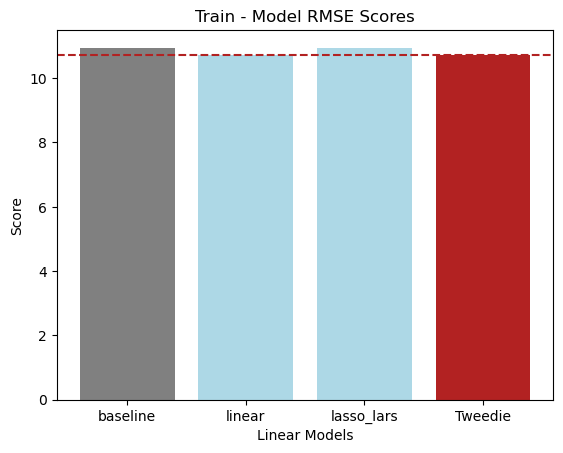

In [31]:
plt.bar(score_chart['model'],score_chart['score'],color=['grey', 'lightblue', 'lightblue', 'firebrick'])
plt.axhline(y = score_chart["score"].min(), color = 'firebrick', linestyle = '--')
plt.title("Train - Model RMSE Scores")
plt.xlabel('Linear Models')
plt.ylabel('Score')
plt.show()

# Validate

In [32]:
# Baseline
validate_preds = pd.DataFrame()
validate_preds['actual'] = y_validate
validate_preds['baseline'] = y_validate.mean()
validate_preds['linear'] = lm.predict(X_validate_scaled)
validate_preds['lasso_lars'] = lars.predict(X_validate_lasso_scale)
validate_preds['Tweedie'] = glm.predict(X_validate_scaled)

In [33]:
validate_baseline_rmse = (sqrt(mean_squared_error(validate_preds['actual'], validate_preds['baseline'])))
validate_linear_rmse = (sqrt(mean_squared_error(validate_preds['actual'], validate_preds['linear'])))
validate_lasso_lars_rmse = (sqrt(mean_squared_error(validate_preds['actual'], validate_preds['lasso_lars'])))
validate_tweedie_rmse = (sqrt(mean_squared_error(validate_preds['actual'], validate_preds['Tweedie'])))

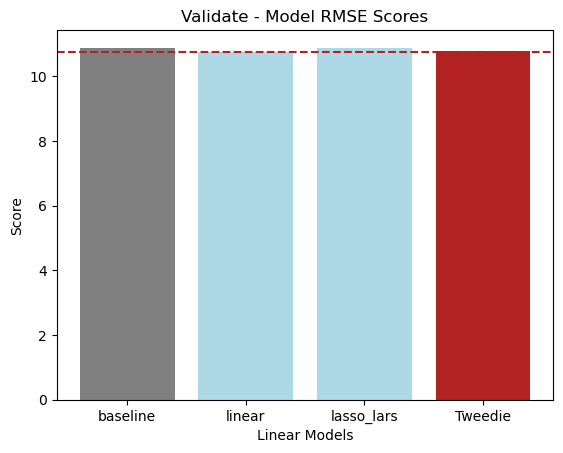

In [34]:
score_chart = pd.DataFrame({'model':['baseline','linear','lasso_lars','Tweedie'],'score':[validate_baseline_rmse,validate_linear_rmse,validate_lasso_lars_rmse,validate_tweedie_rmse]})
plt.bar(score_chart['model'],score_chart['score'],color=['grey', 'lightblue', 'lightblue', 'firebrick'])
plt.axhline(y = score_chart["score"].min(), color = 'firebrick', linestyle = '--')
plt.title("Validate - Model RMSE Scores")
plt.xlabel('Linear Models')
plt.ylabel('Score')
plt.show()

# Test
[Imports](#imports) - [Definitions](#definitions) - [Acquire](#acquire) - [Explore](#explore)  -  [Model](#model)  -  [Evaluate](#evaluate)  -  [Test](#test)  -  [Summary](#summary)  -  [Take Aways](#takeaways)

In [35]:
# Baseline
test_preds = pd.DataFrame()
test_preds['actual'] = y_validate
test_preds['baseline'] = y_validate.mean()
test_preds['linear'] = lm.predict(X_validate_scaled)
test_preds['lasso_lars'] = lars.predict(X_validate_lasso_scale)
test_preds['Tweedie'] = glm.predict(X_validate_scaled)

In [36]:
test_baseline_rmse = (sqrt(mean_squared_error(test_preds['actual'], test_preds['baseline'])))
test_linear_rmse = (sqrt(mean_squared_error(test_preds['actual'], test_preds['linear'])))
test_lasso_lars_rmse = (sqrt(mean_squared_error(test_preds['actual'], test_preds['lasso_lars'])))
test_tweedie_rmse = (sqrt(mean_squared_error(test_preds['actual'], test_preds['Tweedie'])))

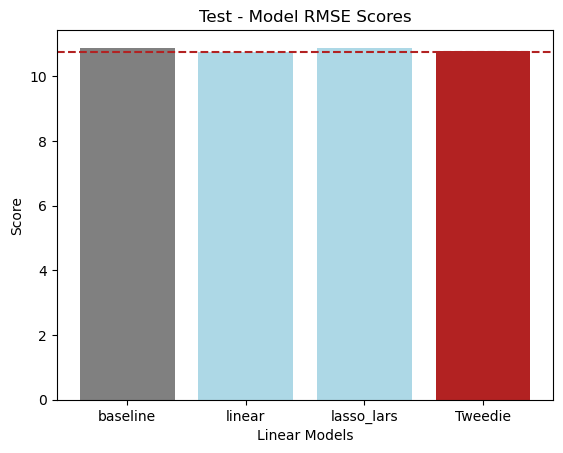

In [37]:
score_chart = pd.DataFrame({'model':['baseline','linear','lasso_lars','Tweedie'],'score':[test_baseline_rmse,test_linear_rmse,test_lasso_lars_rmse,test_tweedie_rmse]})
plt.bar(score_chart['model'],score_chart['score'],color=['grey', 'lightblue', 'lightblue', 'firebrick'])
plt.axhline(y = score_chart["score"].min(), color = 'firebrick', linestyle = '--')
plt.title("Test - Model RMSE Scores")
plt.xlabel('Linear Models')
plt.ylabel('Score')
plt.show()

### Modeling Summary

* Out of the Linear Regression, Lasso Lars, and Tweedie Regressor models Tweedie Regressor performed better than baseline on train and validate

# Conclusion <a id="conclusion"></a>
### Exploration

* 1100 observations

### Modeling

* Tweedie Regressor only beat linear regression by 2 thousandths

# Takeaways <a id="takeaways"></a>
[Imports](#imports) - [Definitions](#definitions) - [Acquire](#acquire) - [Explore](#explore)  -  [Model](#model)  -  [Evaluate](#evaluate)  -  [Test](#test)  -  [Summary](#summary)  -  [Take Aways](#takeaways)

* explicit, energy, loudness were key drivers for time on chart

# Recommendations <a id="recommendations"></a>
[Imports](#imports) - [Definitions](#definitions) - [Acquire](#acquire) - [Explore](#explore)  -  [Model](#model)  -  [Evaluate](#evaluate)  -  [Test](#test)  -  [Summary](#summary)  -  [Take Aways](#takeaways)

* Explore different approach to loudness and energy instaead of compression

# Next Steps <a id="takeaways"></a>
* Look for combination of features to explore correlation
* More structure to planning phase
* Spotify API

[Imports](#imports) - [Definitions](#definitions) - [Acquire](#acquire) - [Explore](#explore)  -  [Model](#model)  -  [Evaluate](#evaluate)  -  [Test](#test)  -  [Summary](#summary)  -  [Take Aways](#takeaways)